# Convexity

In [18]:
import numpy as np
from scipy.optimize import minimize
from sympy import *
import matplotlib.pyplot as plt

## Part 1 - Convexity Test

We will test the convexity of the following function:

$$\gamma(x,y) = 3(1-x)^2e^{-(x^2)-(y+1)^2} - 10(\frac{x}{5}-x^3-y^5)e^{-x^2-y^2} - \frac{1}{3}e^{-(x+1)^2-y^2}$$

using line segments that go from the following $x_1$ and $x_2$ points:

a) $x_1 = (1/10, -1)$, $x_2 = (-11/10, -1)$

b) $x_1 = (-11/10, 17/10)$, $x_2 = (12/10, 17/10)$

c) $x_1 = (1, -1)$, $x_2 = (16/10, 3/5)$

d) $x_1 = (0, 13/5)$, $x_2 = (0, -12/5)$

In [19]:
# We define the function
def gamma(x,y):
    return (3*(1-x)**2)*np.exp(-x**2-(y+1)**2) - 10*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2) - (1/3)*np.exp(-(x+1)**2-y**2)

The function is plotted in $\mathbb{R}^3$ to have a clearer understanding of its shape.

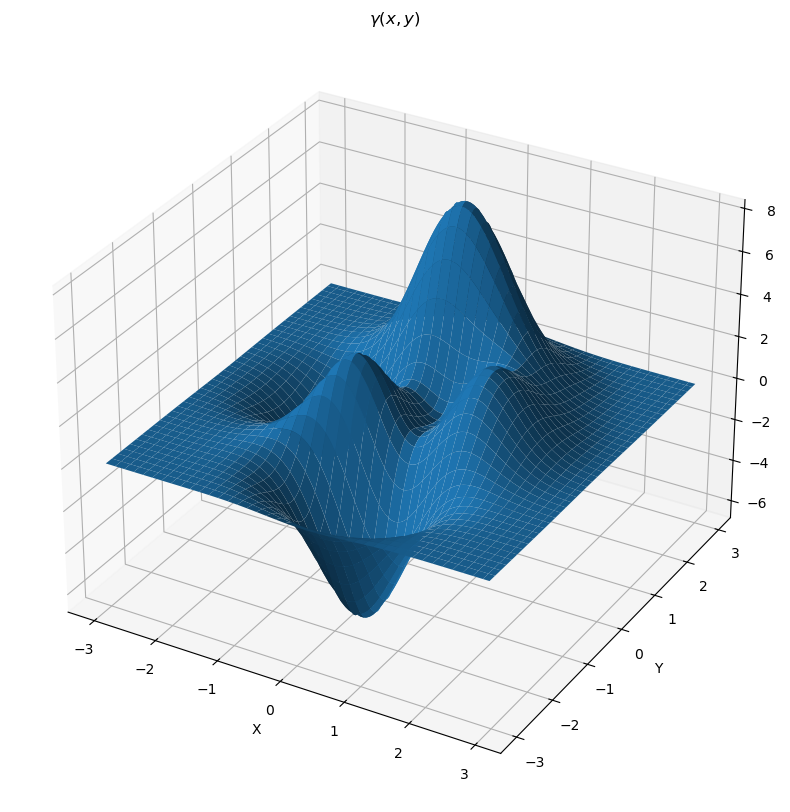

In [20]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3, 3, 0.05)
X, Y = np.meshgrid(x, y)

# Plot the function in R3.
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(r"$\gamma(x,y)$")
plt.show()

To perform the convexity test, we start with the following definition of convexity:

$$f(\alpha x + (1-\alpha)y) \leq \alpha f(x) + (1-\alpha)f(y)$$

In [21]:
def convextest(x1, x2, title):
    # Defining a vector alpha ranging from 0 to 1, evenly spaced into 50 components.
    alpha = np.linspace(0, 1, 50)
    
    # Two lists to store the points of the function and the line segment.
    function = []
    line_segment = []
    
    # For each alpha, the function is evaluated at the two points passed as parameters.
    # Similarly, the line segment is constructed using the right side of the inequality shown previously.
    for a in alpha:
        function.append(gamma(a*x1[0] + (1-a)*x2[0], a*x1[1] + (1-a)*x2[1]))
        line_segment.append(a*gamma(x1[0], x1[1]) + (1-a)*gamma(x2[0], x2[1]))
        
    # Plot parameters
    plt.plot(alpha, function, label="Function")
    plt.plot(alpha, line_segment, label="Line Segment")
    plt.xlabel("$t$", fontsize=12)
    plt.ylabel("$\gamma$", fontsize=12)
    plt.title(title)
    plt.legend(title="Curves")
    plt.grid()
    plt.show()


### a)

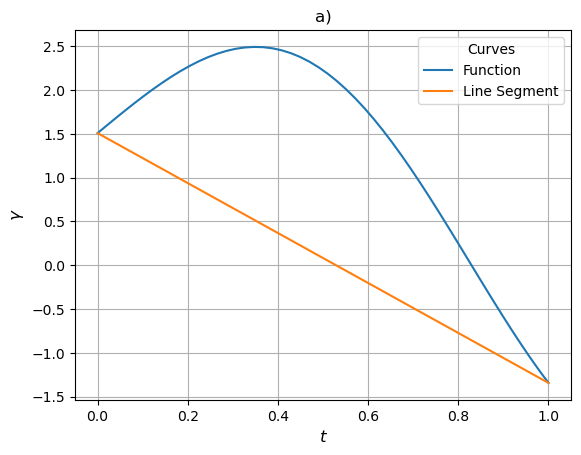

In [22]:
x1 = np.array([[1/10],[-1]])
x2 = np.array([[-11/10],[-1]])
convextest(x1, x2, "a)")

Locally, this function would be concave because -$\gamma$ is convex.

### b)

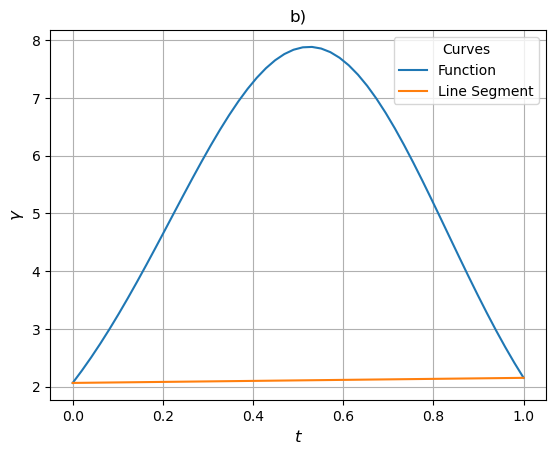

In [23]:
x1 = np.array([[-11/10],[17/10]])
x2 = np.array([[12/10],[17/10]])
convextest(x1, x2, "b)")

Locally, this function would be concave because -$\gamma$ is convex.

### c)

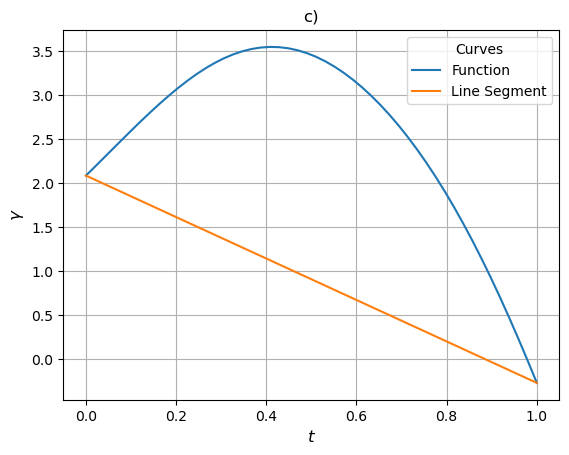

In [24]:
x1 = np.array([[1],[-1]])
x2 = np.array([[16/10],[3/5]])
convextest(x1, x2, "c)")

Locally, this function would be concave because -$\gamma$ is convex.

### d)

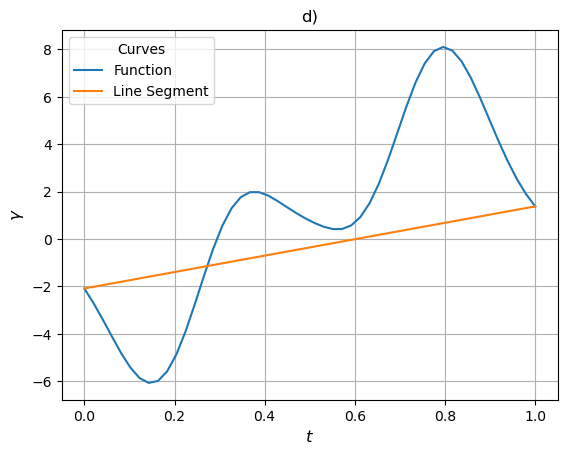

In [25]:
x1 = np.array([[0],[13/5]])
x2 = np.array([[0],[-12/5]])
convextest(x1, x2, "d)")

Locally, this function is neither concave nor convex because the line segment is not always above the function $\gamma$ or below $-\gamma$.

## Part 2 - Contour Plot

Graph of the contour plot of function $\gamma$

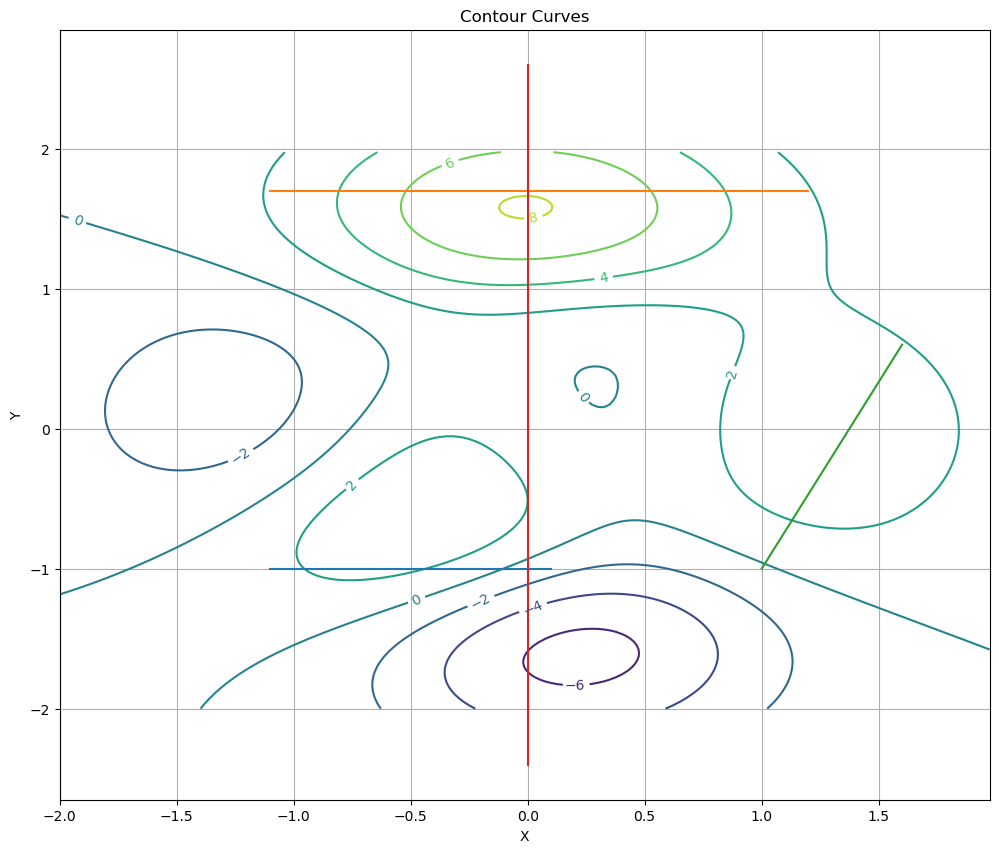

In [26]:
# Defining each coordinate point on which the line segment is drawn.
a = np.array([[1/10, -11/10], [-1, -1]])
b = np.array([[-11/10, 12/10], [17/10, 17/10]])
c = np.array([[1, 16/10], [-1, 3/5]])
d = np.array([[0, 0], [13/5, -12/5]])

step = 0.025
x = np.arange(-2, 2, step)
y = np.arange(-2, 2, step)

X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# These lines define the two extreme points on which the line segment should be drawn,
# over which the convexity test was performed.
plt.plot(a[0], a[1])
plt.plot(b[0], b[1])
plt.plot(c[0], c[1])
plt.plot(d[0], d[1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Contour Curves')
ax.grid() 

## Part 3 - Gradient

### The gradient of the function is plotted over the contour curves.

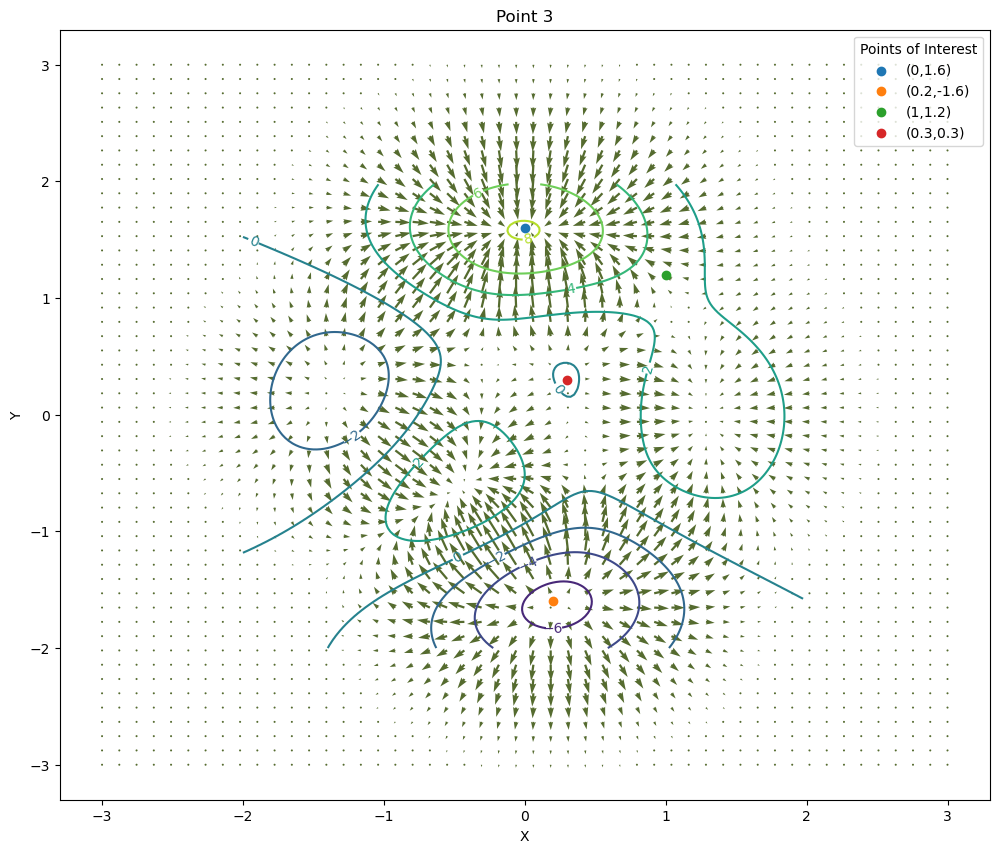

In [27]:
# Creating a grid of ngrad * ngrad squares.
ngrad = 50
scale = 2

# A list with the points of interest to plot.
points = [[0, 1.6], [0.2, -1.6], [1, 1.2], [0.3, 0.3]]

# Defining the space over which the gradient will be defined.
x1 = np.linspace(-3, 3, num=ngrad)
y1 = np.linspace(-3, 3, num=ngrad)

# Evaluating the function.
X1, Y1 = np.meshgrid(x1, y1)
Z1 = gamma(X1, Y1)

# To plot the contour curves on the same plot as the gradient.
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2)*np.exp(-X**2-(Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - (1/3)*np.exp(-(X+1)**2-Y**2)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Defining the gradient of the function.
dy, dx = np.gradient(Z1)

# Drawing the vectors representing the behavior of the gradient on the previously defined grid.
plt.quiver(X1, Y1, dx, dy, 
           scale=100/scale, 
           color='darkolivegreen')

# Printing each point of interest on the same plot.
for p in points:
    aux = p
    ax.scatter(p[0], p[1], label='(' + str(p[0]) + ',' + str(p[1]) + ')')

ax.legend(title='Points of Interest')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Point 3")
plt.show()

### a)
The gradient around the point (0, 1.6) tends to 0. This means that this is a critical point of the function and it can be a local minimum or maximum. Due to the direction in which the gradient points as it approaches this point, it can be said that this is a maximum point, as the gradient always points in the direction of maximum increase of the function.

### b)
The gradient around the point (0.2, -1.6) also tends to zero. Therefore, it is also a critical point of the function. In this case, this point represents a local minimum because the direction of the gradient around this point points outward; that is, the function grows as it moves away from the point.

### c)
The gradient around the point (1, 1.2) does not indicate anything significant about the behavior of the function. At this point, the gradient points towards the nearest critical point, which corresponds to the point (0, 1.6).

### d)
The gradient around the point (0.3, 0.3) also tends to zero. It can be noted that the gradient points outward from this point. That is, the function increases as it moves away from this point. For this reason, this point can be classified as a local minimum.


## Part 4 - Critical Points

The function $\gamma$ is defined again in an alternative way, in order to use the `minimize` function later. Likewise, the negative of the function is defined to distinguish between maxima and minima of the function using `minimize`.


In [28]:
def f(x):
    return (3*(1-x[0])**2)*np.exp(-x[0]**2-(x[1]+1)**2) - 10*(x[0]/5 - x[0]**3 - x[1]**5)*np.exp(-x[0]**2-x[1]**2) - (1/3)*np.exp(-(x[0]+1)**2-x[1]**2)

def f1(x):
    return -f(x)

In [29]:
# Looking at the graph of part 3 and depending on the behavior of the gradient at these points, some
# points are determined which are an approximation of the exact critical point of the function. These points are saved in a list
# and will serve as the initial point for the minimize function to search for the critical point using that point as an initial 
# approximation.

possible_criticals = [[0, 1.6], [0.2, -1.6], [0.3, 0.3], [-0.5, -0.5], [-1.4, 0.2], [1.3, 0]]

for p in possible_criticals:
    print(f'\nApproximation: {p}')
    # It is known that these critical points correspond to local maxima, therefore the minimize function is used with the
    # negative of the function.
    if p == [0, 1.6] or p == [1.3, 0] or p == [-0.5, -0.5]:
        res = minimize(f1, p, method='bfgs')
        print(f'Critical point: {np.round(res.x, 3)}')
    # Since the rest of the points correspond to minima, the function is used as defined from the beginning.
    else:
        res = minimize(f, p, method='bfgs')
        print(f'Real critical point: {np.round(res.x, 3)}')



Approximation: [0, 1.6]
Critical point: [-0.009  1.581]

Approximation: [0.2, -1.6]
Real critical point: [ 0.228 -1.626]

Approximation: [0.3, 0.3]
Real critical point: [0.296 0.32 ]

Approximation: [-0.5, -0.5]
Critical point: [-0.46  -0.629]

Approximation: [-1.4, 0.2]
Real critical point: [-1.347  0.205]

Approximation: [1.3, 0]
Critical point: [ 1.286 -0.005]


### a) 
There are 7 critical points in the function:

| # |   Critical Point  | Classification |
|---|:----------------:|:-------------:|
| 1 |  [-0.009, 1.581] |     Maximum    |
| 2 |  [0.228, -1.626] |     Minimum    |
| 3 |  [0.296, 0.320]  |     Minimum    |
| 4 | [-0.460, -0.629] |     Maximum    |
| 5 |  [-1.347, 0.205] |     Minimum    |
| 6 |  [1.286, -0.005] |     Maximum    |
| 7 |  Any point not in $[-3,3]^2$ |     Saddle Point    |


### b) 
Among these points lies the global maximum and minimum of the function. These points correspond to $x = [-0.009, 1.581]$ and $x = [0.228, -1.626]$, respectively.

This assertion can be made because the points shown in the table are the only minima and maxima of the function for all points in $\mathbb{R}^2$. It is known that the global maximum of the function is $x = [-0.009, 1.581]$, as seen from the graph of $f$ in part 1, where the minimum value of the function is located.

Similarly, it is known that the global minimum of the function is $x = [0.228, -1.626]$, as seen from the graph of $f$ in part 1, where the maximum value of the function is located.
